# Logistic Regression - ex2data1

In [1]:
import seaborn as sns; sns.set()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fmin_bfgs
from sklearn.metrics import accuracy_score
import scipy.optimize as op
import math

In [2]:
data = pd.read_csv('ex2data1.txt', sep=',',
                   skiprows=0, header=None).values

"""
data = np.loadtxt('ex2data2.txt', delimiter=",")
X = data[:,:2]
y = data[:,2]
"""

X = data[:,[0, 1]]
y = data[:,[2]]
m,n = X.shape




In [3]:
"""def ploteo(X,y):
    
    fig, ax = plt.subplots(figsize=(8, 8))
    m,n = X.shape
    for i in range(m):
        x_, y_ = X[i][0], X[i][1]
        if y[i] == 1:
            c = 'tab:orange'
            marker = "*"
            #label = "y = 1"
        else:
            c = 'tab:blue'
            marker = '.'
            #label = "y = 0"
        plt.scatter(x_, y_, c=c, marker=marker)
    return plt.show()"""

def Ploteo(X, y):   
    pos = (y == 1).nonzero()[:1]
    neg = (y == 0).nonzero()[:1]

    plt.plot(X[pos, 0].T, X[pos, 1].T, '*', c="tab:orange", markersize=7)
    plt.plot(X[neg, 0].T, X[neg, 1].T, '.', c="tab:blue", markersize=7)

def plotDecisionBoundary(theta, X, y):
    
    
    
    plt.figure(figsize=(8,8))
    Ploteo(X[:,1:3], y)

    if X.shape[1] <= 3:
        plot_x = np.array([min(X[:,1]) - 2 , max(X[:,1]) + 2])
        plot_y = -1.0/theta[2]*(theta[1]*plot_x + theta[0])
        plt.plot(plot_x, plot_y)
        
    else:
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        
        z = np.zeros((len(u), len(v)))
        
        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = np.dot(mapFeature(u[i:i+1], v[j:j+1]),theta)
                
        z = z.T
        p3 = plt.contour(u, v, z, levels=[0], linewidth=2,marker="." )
        
        # Labels and Legend
        plt.xlabel('Microchip Test 1')
        plt.ylabel('Microchip Test 2')

        plt.legend(['y = 1', 'y = 0', 'Decision boundary'])
        plt.show()

# Part 1: Plotting 

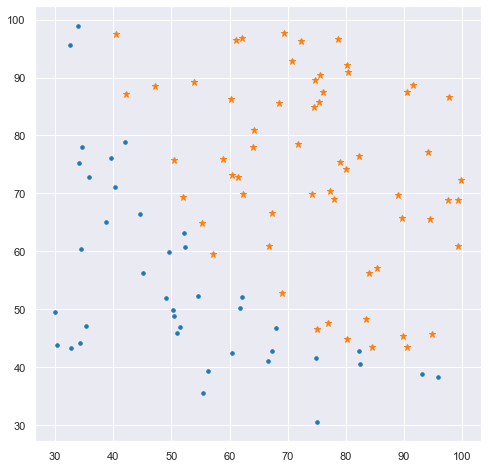

In [4]:
plt.figure(figsize=(8,8))
Ploteo(X,y)
plt.show()

# Part 2: Compute Cost and Gradient


In [5]:
"""
funcion sigmoide
"""
def sigmoid(z):
    y = (1/(1 + (math.exp(-z))))
    return y

"""
sumatoria pra calcular el valor de J
"""
def suma(X, y, theta):
    s = 0
    m = len(y)
    
    for i in range(m):
        z = np.sum(X[i,0:3]*theta)
        s = s + (-y[i]*math.log(sigmoid(z)) - (1 - y[i])*math.log(1 - sigmoid(z)))
    return s

"""
calculo del costo y gradiente
"""
def costFunction(theta, X, y):
    m, n = y.shape
    t = 1/m
    grad = np.zeros(len(theta))
    T = np.zeros(m)
    J = t*suma(X, y, theta)
    
    for i in range(m):
        T[i] = sigmoid(np.sum(theta*X[i]))
    V = np.vstack(T) - y
    grad = t*((X*V).sum(axis=0))
    
    return J, grad

    
#costFunction(initial_theta, X, y)
    

In [6]:
m,n = X.shape
X = np.append([[1 for _ in range(0,m)]], X.T,0).T

initial_theta = np.zeros(n+1)
cost, grad = costFunction(initial_theta, X, y)


In [7]:
# Compute and display initial cost and gradient
print('Cost at initial theta (zeros): ', cost)
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros):\n',grad)
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n')

Cost at initial theta (zeros):  [0.69314718]
Expected cost (approx): 0.693
Gradient at initial theta (zeros):
 [ -0.1        -12.00921659 -11.26284221]
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628



In [8]:
# Compute and display cost and gradient with non-zero theta
test_theta = np.array([-24.0, 0.2, 0.2])
[cost, grad] = costFunction(test_theta, X, y)
print('\nCost at test theta: \n', cost)
print('Expected cost (approx): 0.218\n')
print('Gradient at test theta:')
print('', grad)
print('\nExpected gradients (approx):\n 0.043\n 2.566\n 2.647\n')


Cost at test theta: 
 [0.21833019]
Expected cost (approx): 0.218

Gradient at test theta:
 [0.04290299 2.56623412 2.64679737]

Expected gradients (approx):
 0.043
 2.566
 2.647



# Part 3: Optimizing using fminunc

In [9]:
"""
calculo del costo y gradiente
"""
def costFunction(theta, X, y):
    m, n = y.shape
    t = 1/m
    J = t*suma(X, y, theta)
    
    return J

def gradiente(theta, X, y):
    m, n = y.shape
    T = np.zeros(m)
    t = 1/m
    grad = np.zeros(len(theta))
    
    for i in range(m):
        T[i] = sigmoid(np.sum(theta*X[i]))
    V = np.vstack(T) - y
    grad = t*((X*V).sum(axis=0))
    
    return grad

In [10]:
initial_theta = np.zeros(n+1)

Result = op.minimize(fun = costFunction, 
                     x0 = initial_theta,
                     args = (X, y),
                     method = 'TNC', 
                     jac = gradiente)
            
optimal_theta = Result.x
cost = Result.fun[0]

# Print theta to screen
print('Cost at theta found by fminunc: {}\n'.format(cost))
print('Expected cost (approx): 0.203\n')
print('theta: \n')
print('------ {} \n'.format(optimal_theta))
print('Expected theta (approx):\n')
print(' -25.161\n 0.206\n 0.201\n')

Cost at theta found by fminunc: 0.20349770158947408

Expected cost (approx): 0.203

theta: 

------ [-25.16131873   0.20623159   0.20147149] 

Expected theta (approx):

 -25.161
 0.206
 0.201



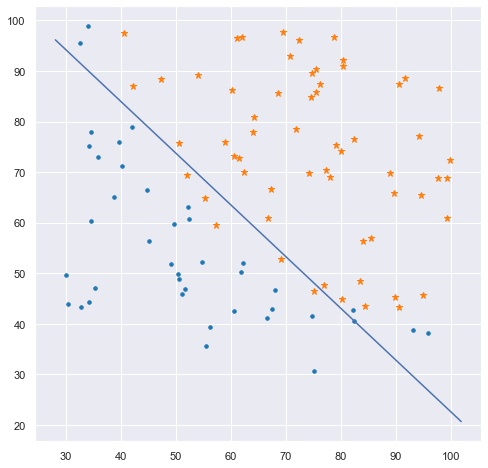

In [11]:
plotDecisionBoundary(optimal_theta, X, y)

# Part 4: Predict and Accuracies 

In [12]:
def predict(theta, X):
    u = []
    i = 0
    for i in range(m):
        x = np.vstack(X[i]).T
        z = (x*theta.T).sum(axis=1)
        v = round(sigmoid(z))
        u.append(v)
    return u


In [13]:
theta = np.vstack([-25.161272, 0.206233, 0.201470])
x = np.vstack([1.0, 45.0, 85.0])
z = (x*theta).sum(axis=0)
prob = sigmoid(z)

print('For a student with scores 45 and 85, we predict an admission,probability of: ', prob)
print('Expected value: 0.775 +/- 0.002\n\n');

For a student with scores 45 and 85, we predict an admission,probability of:  0.7762878133064746
Expected value: 0.775 +/- 0.002




In [14]:
p = predict(theta, X)
print('Train Accuracy:', accuracy_score(y, p))
print('Expected accuracy (approx): 89.0\n')
print('\n')



Train Accuracy: 0.89
Expected accuracy (approx): 89.0





#  Exercise 2: Logistic Regression

# Part 1: Regularized Logistic Regression

In [15]:
data = pd.read_csv('ex2data2.txt', sep=',',
                   skiprows=0, header=None).values

X = data[:,[0, 1]]
y = data[:,[2]]


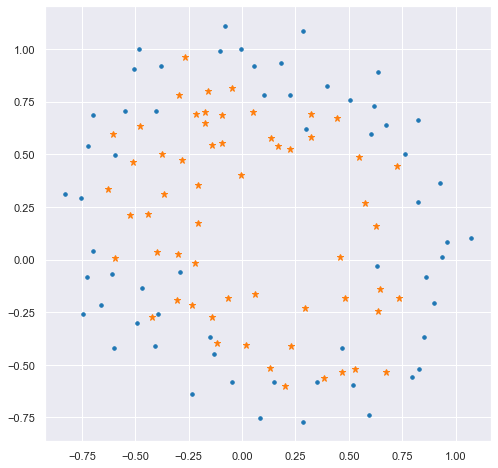

In [16]:
plt.figure(figsize=(8,8))
Ploteo(X,y)
plt.show()

In [17]:
#X[:,0]---> 0 indice de la columna en a matriz


In [28]:
def mapFeature(X1, X2):
    degree = 6
    out = np.ones((X1.shape[0],28))
    num_column = 1

    for i in range(1, degree+1):
        for j in range(i+1):
            out[:,num_column] = np.power(X1,i-j) * np.power(X2,j)
            num_column += 1
    return out



In [29]:
def sigmoid(z):
    g = 1.0/ (1.0 + np.exp(-z))
    return g

        
    
def gradFunctionReg(theta, X, y, lamb):

    m = len(y)
    t = 1.0/m
    
    h = np.dot(X,theta)+1
    h = sigmoid(h)
    
    
    grad = t*np.dot(X.T, (h - y)) + (1.0*lamb/m)*theta
    grad[0] = t*np.dot(X[:,0].T, (h - y))
    ####print(grad)
    
    
    return grad



def costFunctionReg(theta, X, y, lamb):
    
    m = len(y)
    
    t = (1.0/m)
    u = lamb/(2*m)
    
    ##########################################
    ## calculo del costo con regularizacion ##
    
    h = np.dot(X, theta)
    h = sigmoid(h)
   
    #g = X @ theta
    #print(h,g)
    
    
    J = -t * (y.T @ np.log(h) + (1 - y.T) @ np.log(1 - h))
    reg = (lamb/(2*m)) * (theta[1:].T @ theta[1:])
    J = J + reg
    
    #J = (t*np.sum(-y*np.log(h) - ((1 - y)*np.log(1 - h)))) + u*np.sum(np.dot(theta.T, theta))
    
    
    grad = t*np.dot(X.T, (h - y)) + (1.0*lamb/m)*theta
    grad[0] = t*np.dot(X[:,0].T, (h - y))
    
    return J, grad

 


In [30]:
X = mapFeature(data[:,0], data[:,1])

In [31]:
# Compute and display initial cost and gradient for regularized logistic
# regression

m, n = X.shape
initital_theta = np.zeros((n, 1))
lamb = 1

cost,grad = costFunctionReg(initital_theta, X, y, lamb)
#grad = gradFunctionReg(initital_theta, X, y, lamb)

print('Cost at initial theta (zeros): \n', cost)
print('Expected cost (approx): 0.693\n')
print('Gradient at initial theta (zeros) - first five values only:\n')
print(': \n', grad[:5])
print('Expected gradients (approx) - first five values only:\n')
print(' 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n')

Cost at initial theta (zeros): 
 [[0.69314718]]
Expected cost (approx): 0.693

Gradient at initial theta (zeros) - first five values only:

: 
 [[8.47457627e-03]
 [1.87880932e-02]
 [7.77711864e-05]
 [5.03446395e-02]
 [1.15013308e-02]]
Expected gradients (approx) - first five values only:

 0.0085
 0.0188
 0.0001
 0.0503
 0.0115



In [32]:
# Compute and display cost and gradient
# with all-ones theta and lambda = 10
test_theta = np.ones((n,1))

cost,grad = costFunctionReg(test_theta, X, y, 10)
###grad = gradFunctionReg(test_theta, X, y, 10)
print('\nCost at test theta (with lambda = 10): \n', cost)
print('Expected cost (approx): 3.16\n')
print('Gradient at test theta - first five values only:\n')
print('-->: ', grad[0:5])
print('Expected gradients (approx) - first five values only:\n')
print(' 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922\n')


Cost at test theta (with lambda = 10): 
 [[3.16450933]]
Expected cost (approx): 3.16

Gradient at test theta - first five values only:

-->:  [[0.34604507]
 [0.16135192]
 [0.19479576]
 [0.22686278]
 [0.09218568]]
Expected gradients (approx) - first five values only:

 0.3460
 0.1614
 0.1948
 0.2269
 0.0922



In [33]:
theta = np.ones((n,1))
lamb = 1

output = op.fmin_tnc(func = costFunctionReg,
                      x0 = theta.flatten(),
                      args = (X, y.flatten(),
                              lamb))
theta = output[0]
print(theta) # theta contains the optimized values

[ 1.27273509  0.62525435  1.18108521 -2.01994882 -0.91742556 -1.43167368
  0.12399628 -0.36552234 -0.35723208 -0.17514253 -1.4581339  -0.05098852
 -0.61553085 -0.27470069 -1.19280263 -0.24220871 -0.20601057 -0.04472766
 -0.2777735  -0.29536755 -0.45637086 -1.04318579  0.02776829 -0.29241701
  0.01556523 -0.32737793 -0.14388044 -0.92463148]


# Part 2: Regularization and Accuracies

In [24]:

from scipy import optimize
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

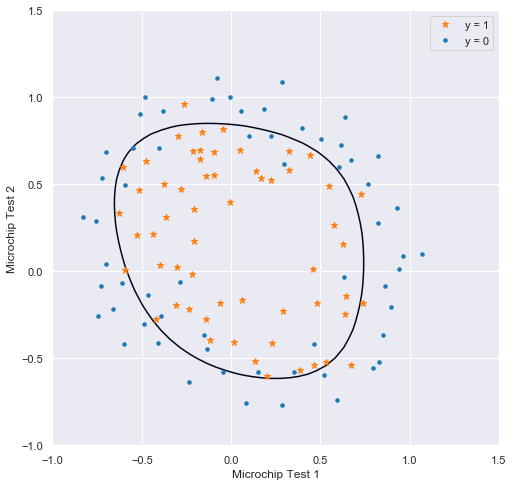

In [25]:
plotDecisionBoundary(theta, X, y)

In [26]:
def predict(theta, X):
    p = np.round(sigmoid(np.dot(X,theta)))
    return p
    

In [27]:
# Compute accuracy on our training set
p = predict(theta, X)
acc = accuracy_score(y, p)
print('Train Accuracy: {}\n'.format(acc))
print('Expected accuracy (with lambda = 1): 83.1 (approx)\n')



Train Accuracy: 0.8305084745762712

Expected accuracy (with lambda = 1): 83.1 (approx)

